### Exploração e Visualização de Dados 
* Case: https://www.kaggle.com/c/titanic



#### Importando Biblioteca de Funções Turing Lab e Turing IA

In [1]:
id_empresa = '1022'
nm_bucket = 'turing-bkt-treinamentos-prod'
%run -i '/home/.Turing/TuringCredentialsAccess.py3'
%run -i '/home/.Turing/TuringLabFunctions.py3'

-------------------- LabTuring ---------------------------
----------- Exploração de Dados e Modelagem --------------
------ Funções carregadas em memória com sucesso ---------
--------- Data da última atualização: --------------------
--------------- 10/11/2019 -------------------------------
----------------------------------------------------------


#### Mapear bibliotecas Python necessárias

In [2]:
import pandas as pd
import numpy as np

#### Gerando credenciais de acesso aos dados

In [3]:
S3fs,S3session,S3client,S3resource = TuringUsersCredentialsControl(id_empresa)

#### Lendo ABT de modelagem

In [4]:
# Nome da tabela de modelagem
nm_abt = 'ABT_V01_BJ.csv'

# Nome da variável resposta
targetname = 'TARGET'

# Nome da variável chave (ID)
id_name = 'SK_ID_CURR'

df_00 = TuringReadS3File(S3client,nm_bucket,'Projetos/FLAT_TABLES/'+nm_abt,sep=',')
df_00.shape

Arquivo csv carregado em memoria


(307511, 150)

In [5]:
df_00.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,AVG_AMT_CREDIT_SUM_OVERDUE,MIN_DAYS_CREDIT_UPDATE,MAX_DAYS_CREDIT_UPDATE,AVG_DAYS_CREDIT_UPDATE,MIN_CNT_CREDIT_PROLONG,MAX_CNT_CREDIT_PROLONG,AVG_CNT_CREDIT_PROLONG,MIN_AMT_ANNUITY,MAX_AMT_ANNUITY,AVG_AMT_ANNUITY
0,100274,0,0,308250.0,1305000.0,38281.5,1305000.0,0.026392,-15612,-1106,...,0.0,-42.0,-42.0,-42.0,0.0,0.0,0.0,NaN,NaN,NaN
1,100800,0,0,126000.0,698517.0,23215.5,603000.0,0.018634,-21314,365243,...,0.0,-43.0,-43.0,-43.0,0.0,0.0,0.0,NaN,NaN,NaN
2,100884,0,0,157500.0,327024.0,21420.0,270000.0,0.018029,-10960,-1091,...,0.0,-14.0,-13.0,-13.5,0.0,0.0,0.0,NaN,NaN,NaN
3,100986,0,0,180000.0,640080.0,29970.0,450000.0,0.010147,-17231,-3683,...,0.0,-30.0,-30.0,-30.0,0.0,0.0,0.0,NaN,NaN,NaN
4,101094,0,0,112500.0,819432.0,23958.0,684000.0,0.028663,-23643,-3326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Análise de Missings

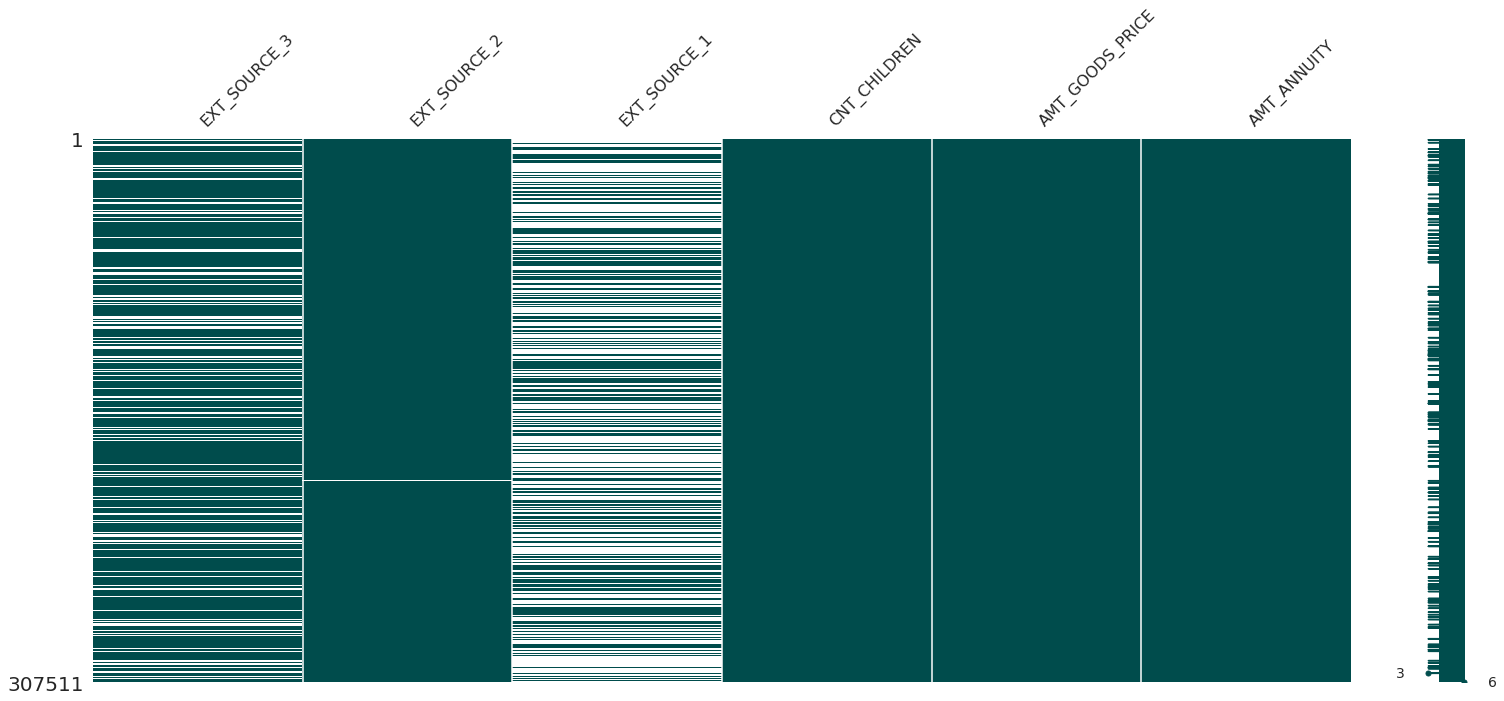

In [18]:
lista_vars = ['EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','CNT_CHILDREN','AMT_GOODS_PRICE','AMT_ANNUITY']
TuringMissingPlot(df_00[lista_vars])

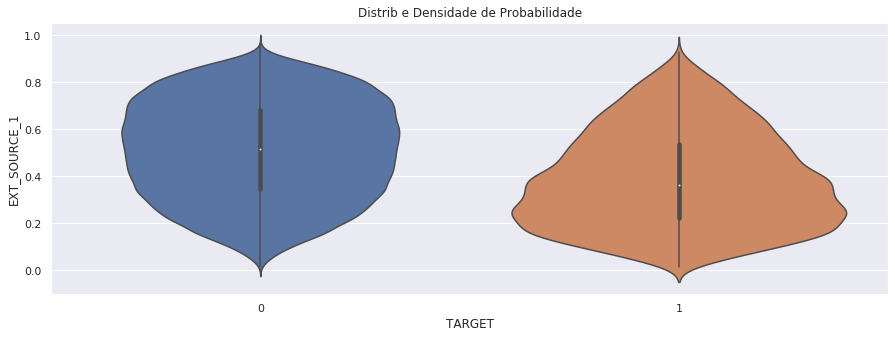

'TuringViolinPlot'

In [27]:
TuringViolinPlot(df_00,'TARGET','EXT_SOURCE_1',title='Distrib e Densidade de Probabilidade',figsizey=5,figsizex=15)

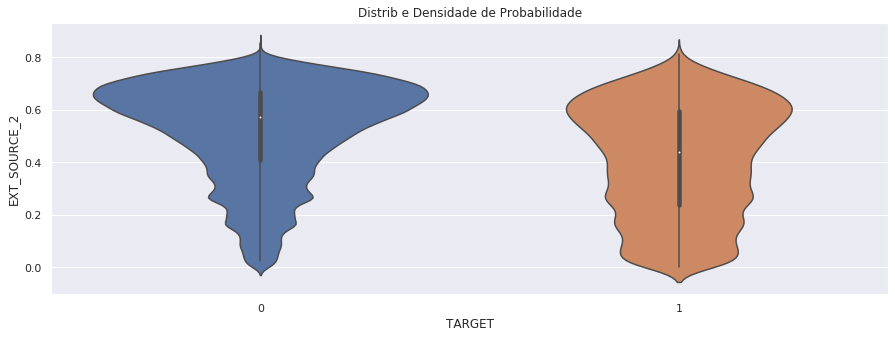

'TuringViolinPlot'

In [28]:
TuringViolinPlot(df_00,'TARGET','EXT_SOURCE_2',title='Distrib e Densidade de Probabilidade',figsizey=5,figsizex=15)

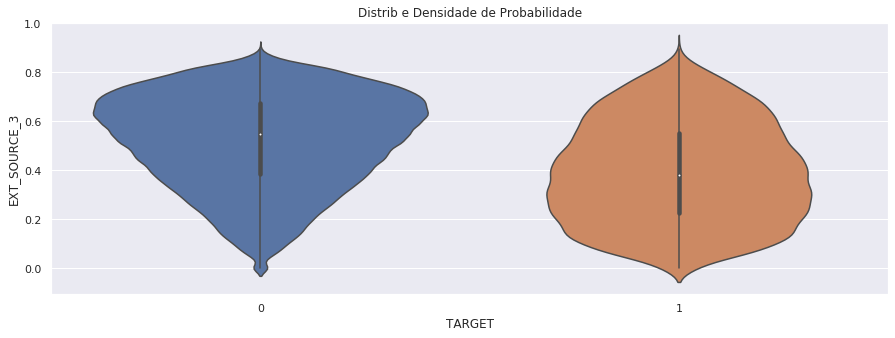

'TuringViolinPlot'

In [29]:
TuringViolinPlot(df_00,'TARGET','EXT_SOURCE_3',title='Distrib e Densidade de Probabilidade',figsizey=5,figsizex=15)

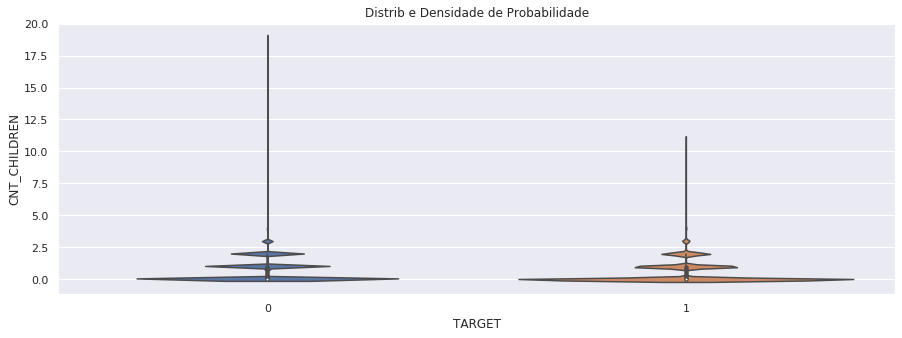

'TuringViolinPlot'

In [25]:
TuringViolinPlot(df_00,'TARGET','CNT_CHILDREN',title='Distrib e Densidade de Probabilidade',figsizey=5,figsizex=15)

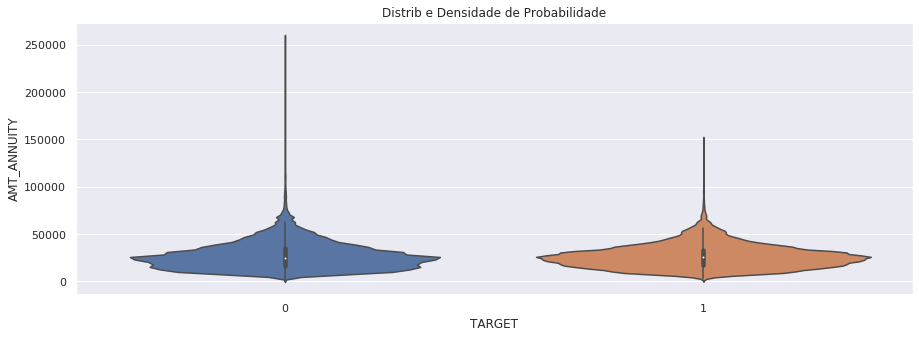

'TuringViolinPlot'

In [30]:
TuringViolinPlot(df_00,'TARGET','AMT_ANNUITY',title='Distrib e Densidade de Probabilidade',figsizey=5,figsizex=15)

#### Correlação de Pearson

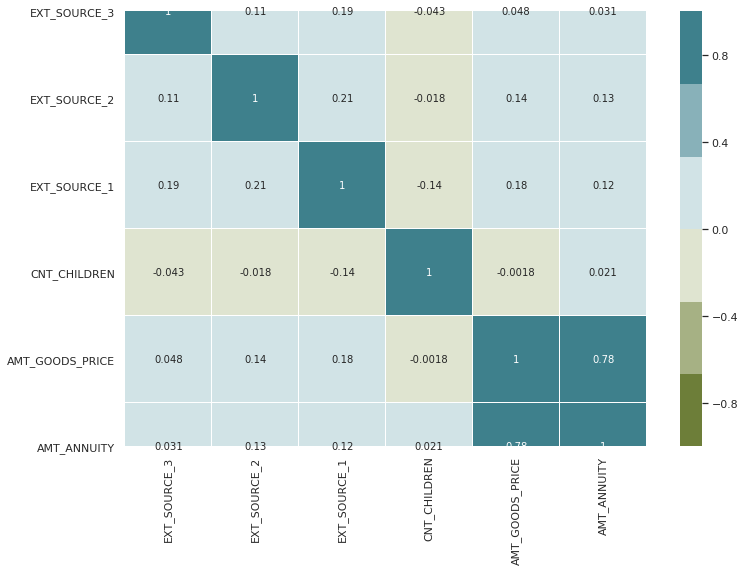

In [31]:
TuringPearsonCorr(df_00[lista_vars],lx=12,ly=8)

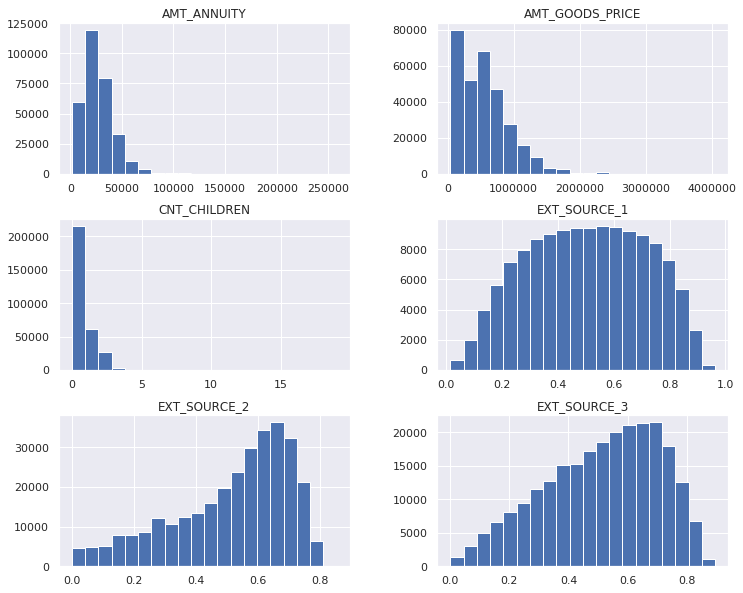

In [32]:
TuringHistogram(df_00[lista_vars])  

### Aplicando tratamento de dados

In [33]:
df_00_amt = TuringSampleData(df_00,pct=0.2,seed=10004)
metadados = TuringFastMetadata(df_00_amt,id_name,targetname)
df_dp = TuringFastDataPrep(metadados,df_00_amt,id_name,targetname)

('Amostra de ', 61502, 'linhas gerada com sucesso')
Gerando Metadados...
Metadado Gerado Com Sucesso
Iniciando Preparação de Dados...
Executando
Turing Fast Data Preparation Concluído com Sucesso


#### PairPlot

Turing Visualização de Dados - PairPlot


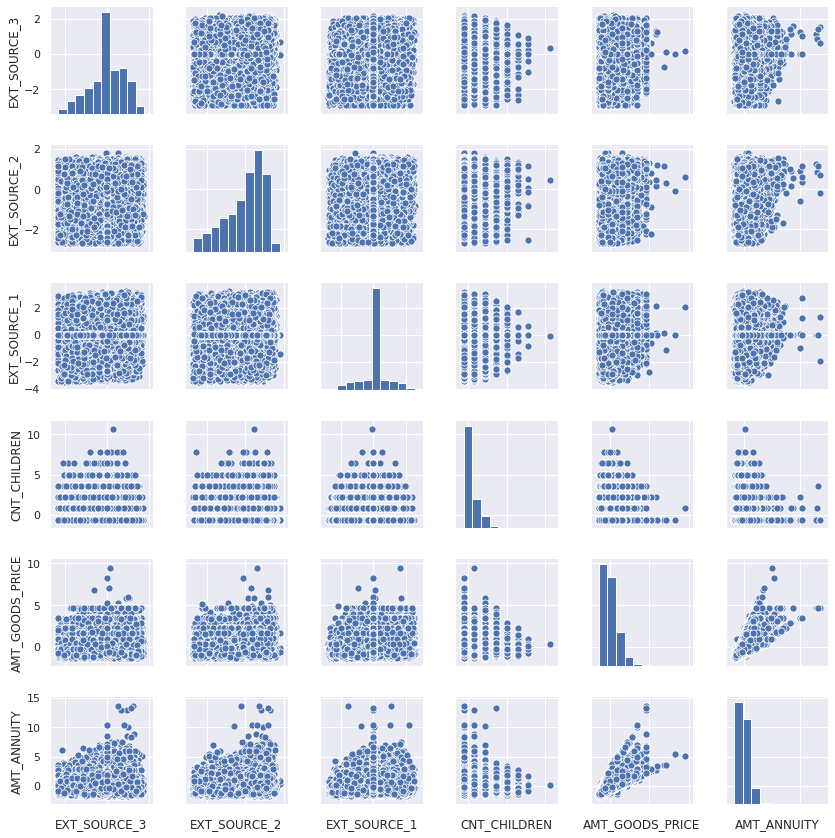

In [34]:
TuringDVPairPlot(df_dp[lista_vars],sizegraph=2,plot_s = 50)

Turing Visualização de Dados - PairPlot


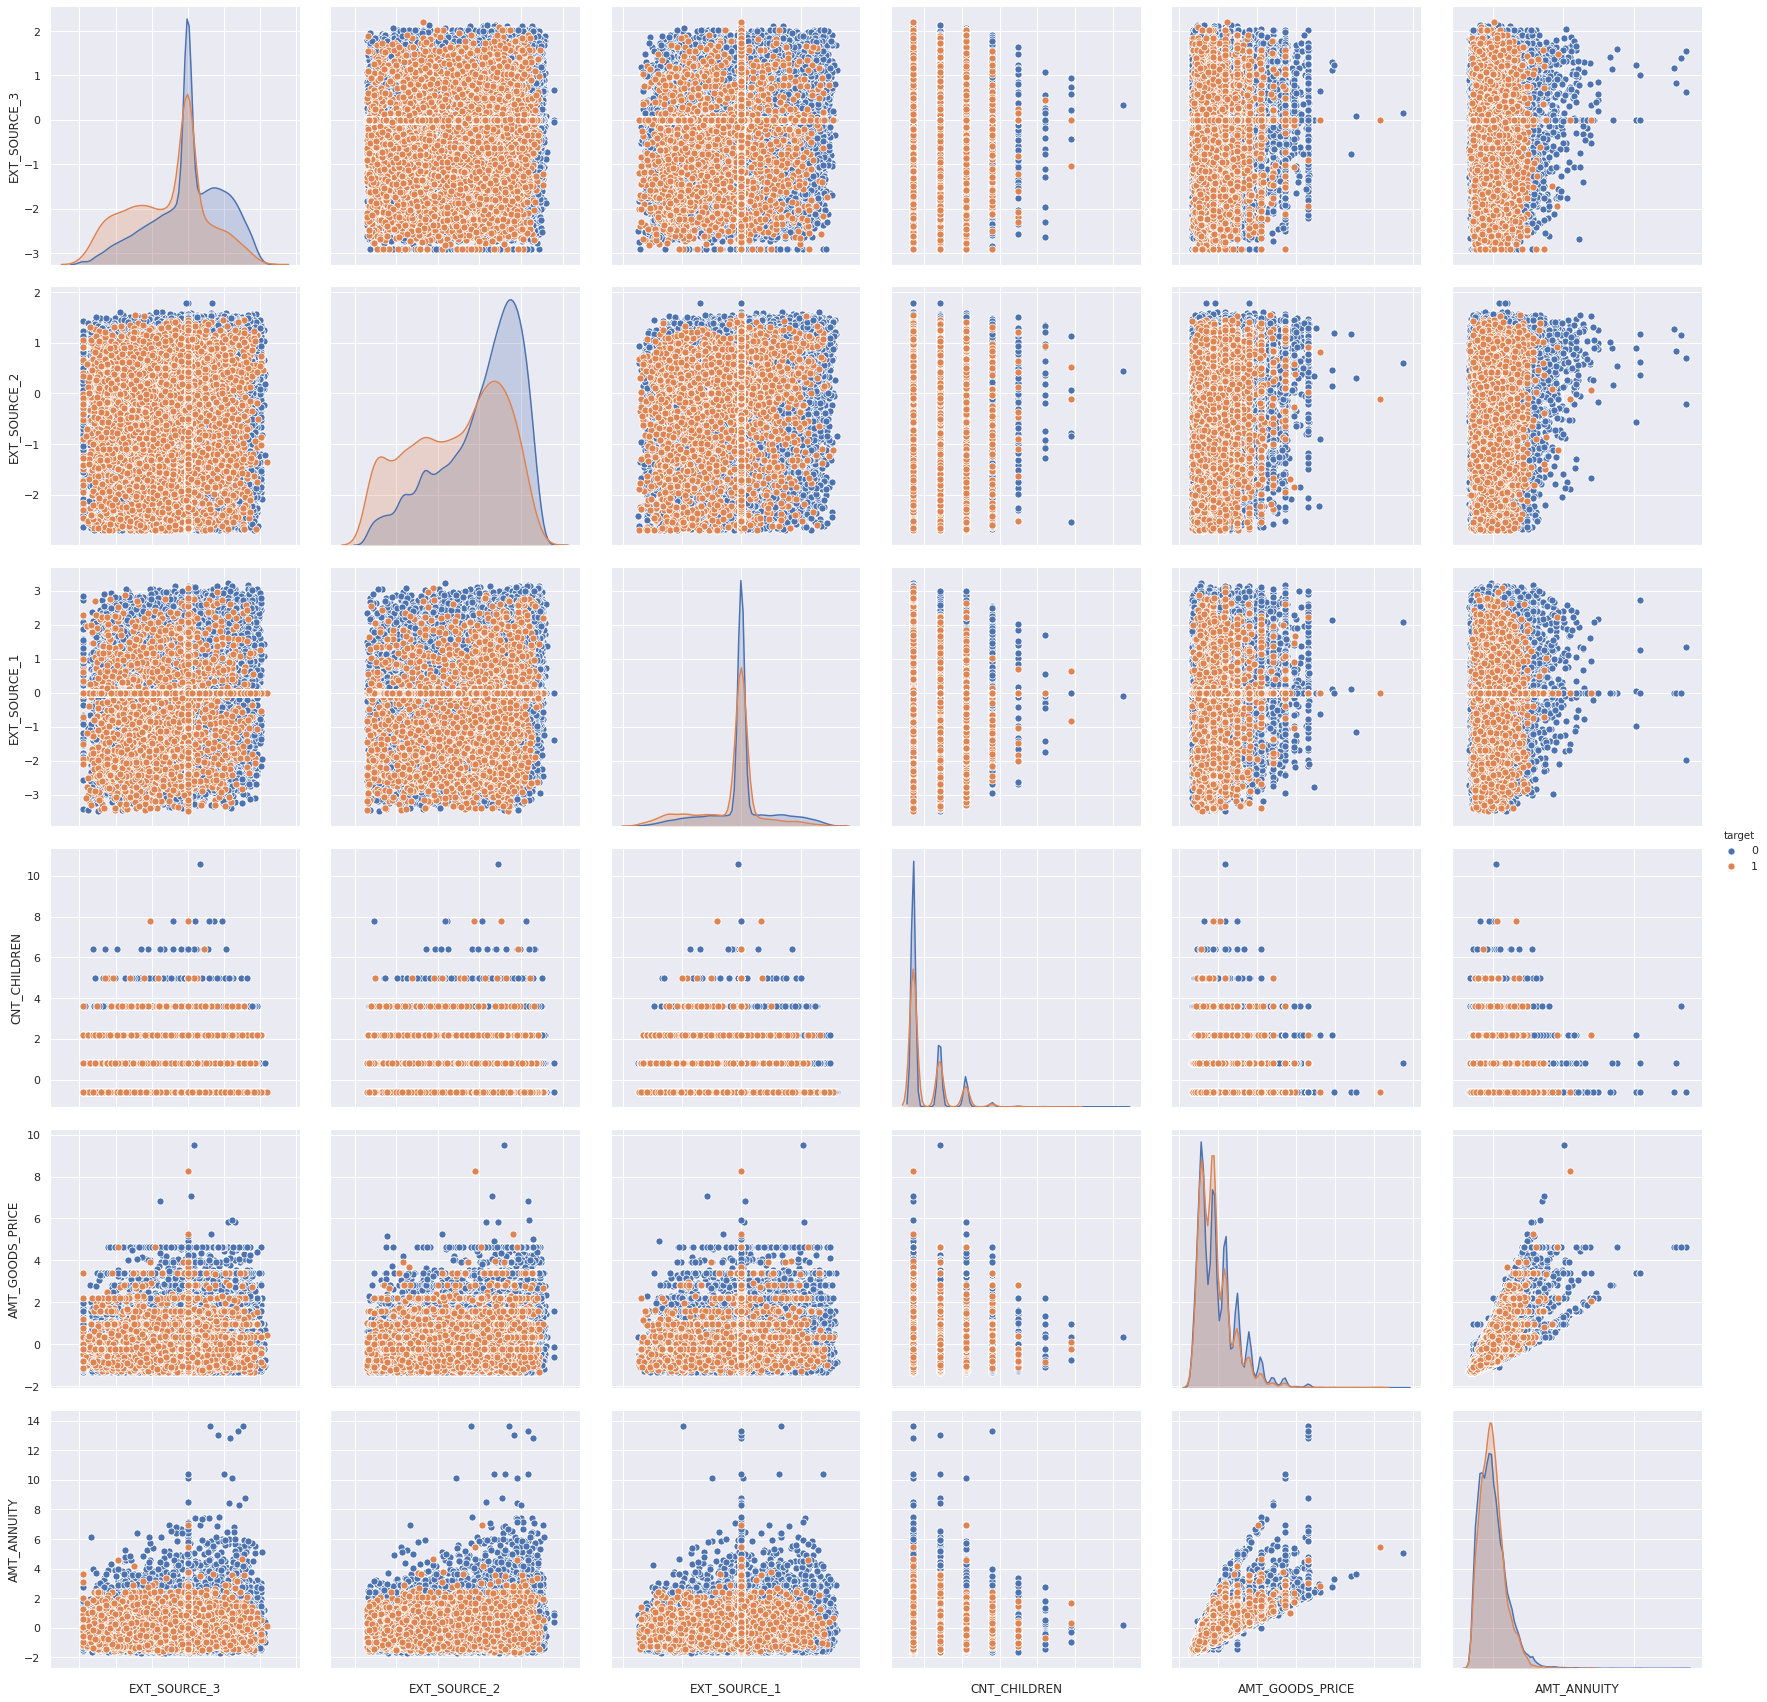

In [35]:
TuringDVPairPlot(df_dp,lista_vars,targetname='target',sizegraph=4,plot_s = 50)

'TuringNormalProbPlot'

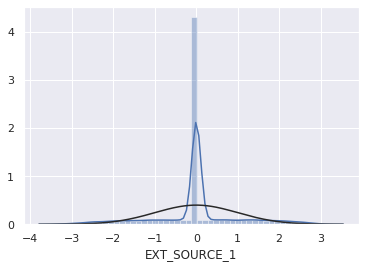

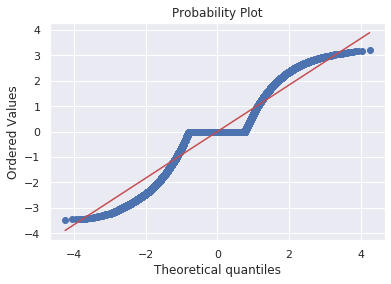

In [37]:
TuringNormalProbPlot(df_dp,'EXT_SOURCE_1')

'TuringNormalProbPlot'

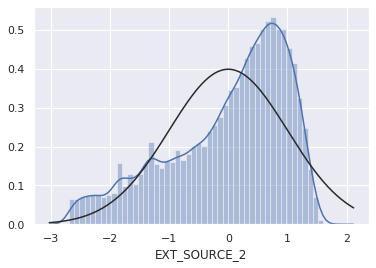

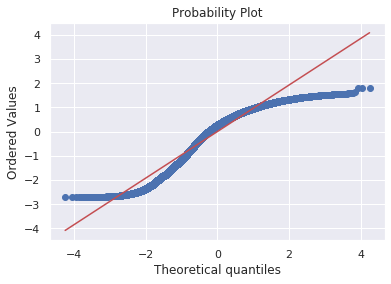

In [38]:
TuringNormalProbPlot(df_dp,'EXT_SOURCE_2')

'TuringNormalProbPlot'

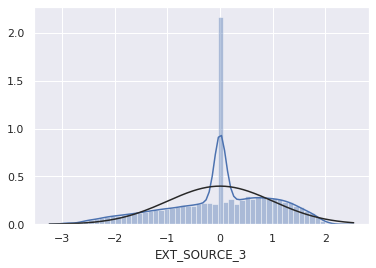

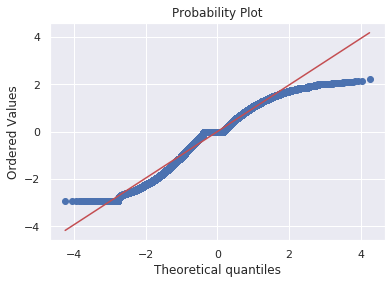

In [39]:
TuringNormalProbPlot(df_dp,'EXT_SOURCE_3')